In [ ]:
!wget https://raw.githubusercontent.com/yubi50/Supermarket-Sales-Dataset/main/sales.csv

--2022-07-06 09:57:33--  https://raw.githubusercontent.com/yubi50/Supermarket-Sales-Dataset/main/sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131528 (128K) [text/plain]
Saving to: ‘sales.csv’

sales.csv           100%[===================>] 128.45K  --.-KB/s    in 0.003s  

2022-07-06 09:57:33 (37.8 MB/s) - ‘sales.csv’ saved [131528/131528]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
!ls

sales.csv  sample_data


In [ ]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
z_scores = stats.zscore(df.Quantity)

In [ ]:
sum(z_scores < -3)

0

In [ ]:
sum(z_scores > 3)

0

In [ ]:
z_score2 = stats.zscore(df.Rating)
z_score2

array([ 1.23844341,  1.52952681,  0.24875987,  0.83092666, -0.97379039,
       -1.67239054, -0.682707  ,  0.59805994,  0.13232651, -0.62449032,
       -1.43952382, -0.1005402 ,  0.07410983,  0.7144933 , -0.74092368,
       -1.43952382, -1.38130715, -0.04232353,  0.94736002, -1.4977405 ,
       -1.26487379, -1.09022375, -1.4977405 ,  1.70417685, -0.56627364,
        0.88914334, -0.15875688,  0.42340991,  1.52952681,  0.24875987,
       -1.26487379, -1.43952382, -1.09022375, -1.09022375,  0.30697655,
       -0.1005402 ,  0.01589315, -1.32309047,  0.36519323,  0.42340991,
        0.53984327, -0.3916236 , -0.79914035,  0.36519323,  0.13232651,
        1.47131013,  0.83092666, -1.67239054,  0.65627662,  0.53984327,
        1.47131013,  0.88914334, -0.27519024, -0.50805696, -0.27519024,
        0.7144933 , -0.682707  , -0.21697356, -0.91557371,  1.35487677,
        1.76239353,  0.01589315,  1.76239353,  0.94736002,  0.36519323,
       -0.682707  , -0.15875688,  1.70417685, -0.33340692, -1.55

In [ ]:
sum(z_score2 > 3)

0

In [ ]:
sum(z_score2 < -3)

0

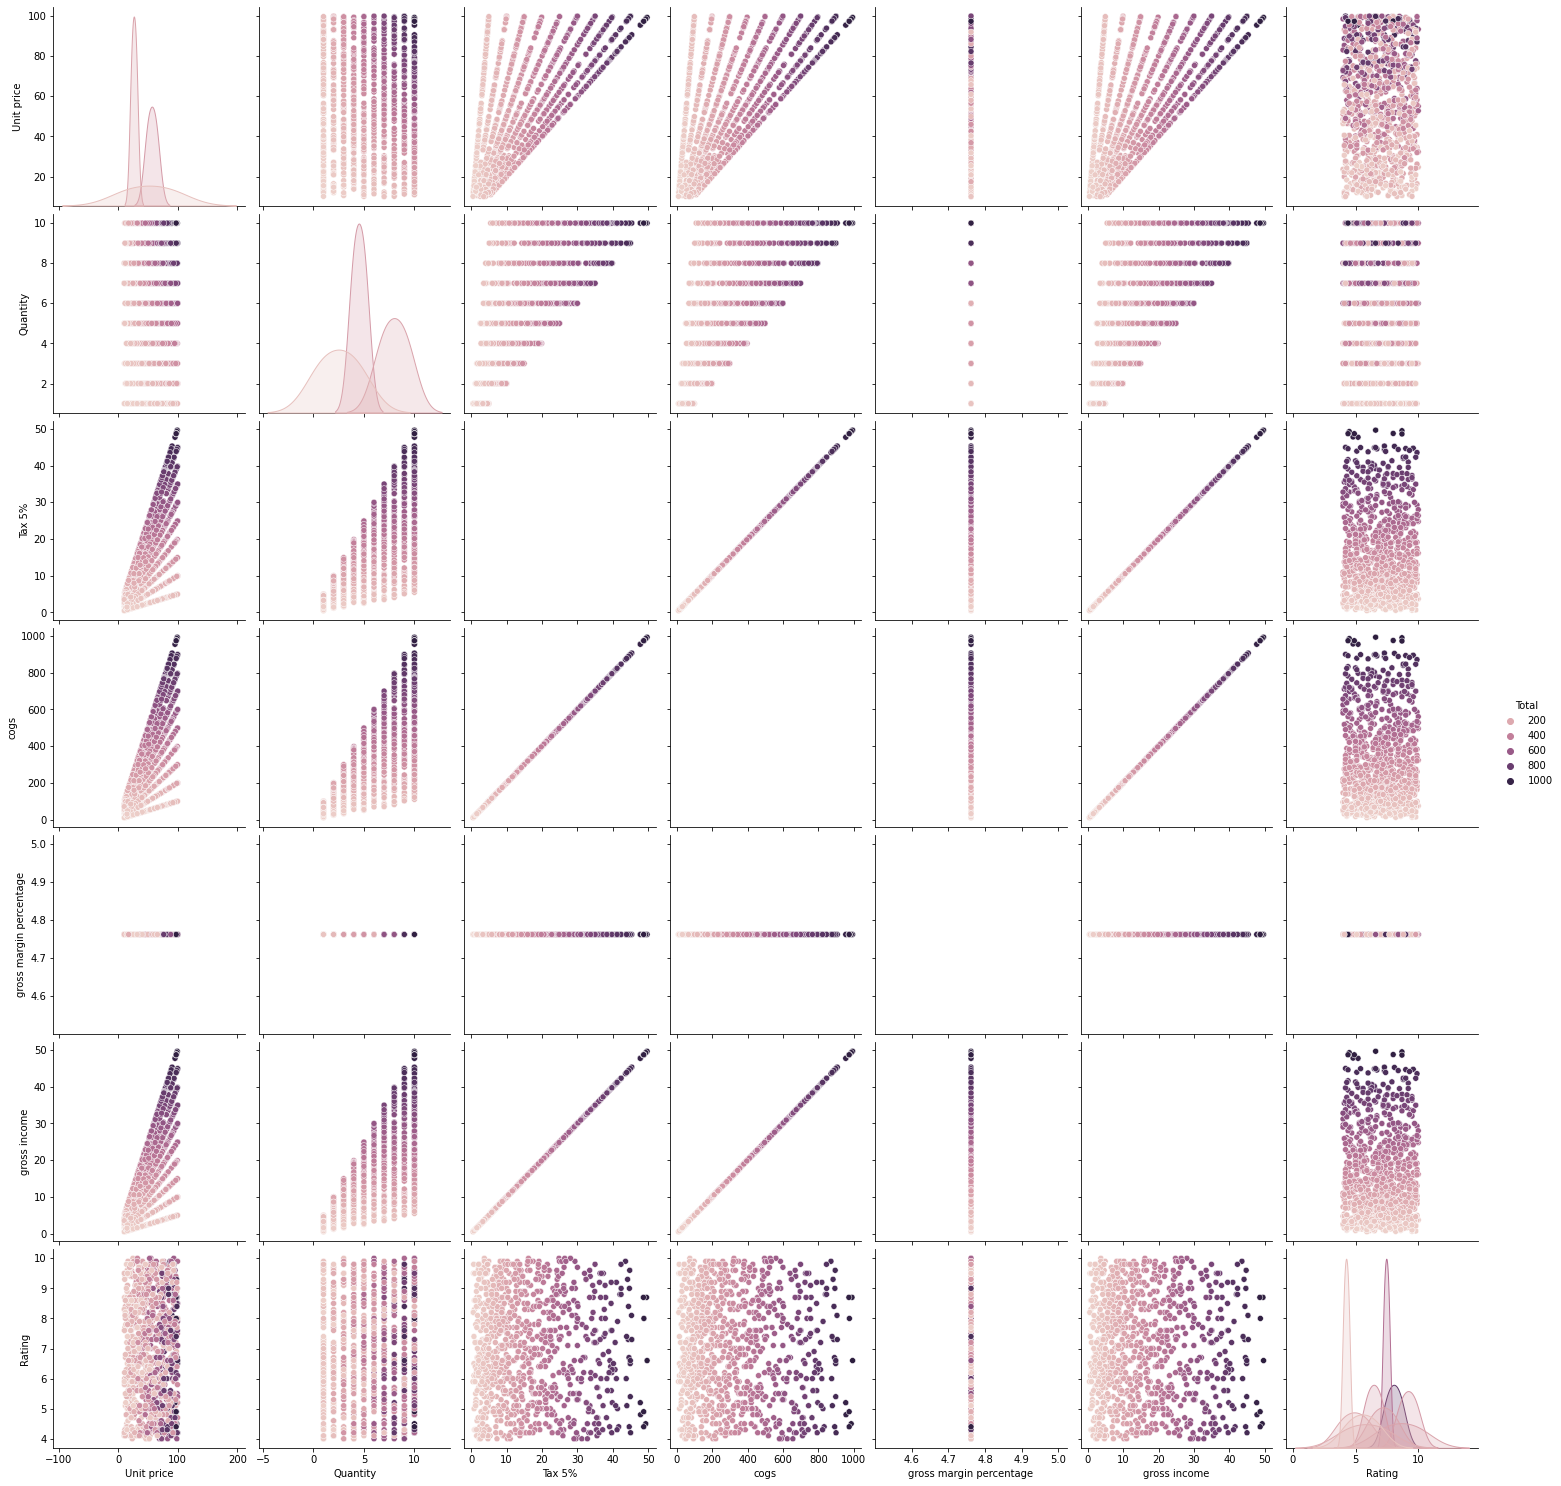

In [ ]:
sns.pairplot(df, hue="Total", height = 3)

In [ ]:
pt = df.pivot_table(values='Quantity', index='Product line',aggfunc='sum')
pt.sort_values('Quantity', ascending = False)

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


In [ ]:
pt.sort_values('Quantity', ascending = False).index

Index(['Electronic accessories', 'Food and beverages', 'Sports and travel',
       'Home and lifestyle', 'Fashion accessories', 'Health and beauty'],
      dtype='object', name='Product line')

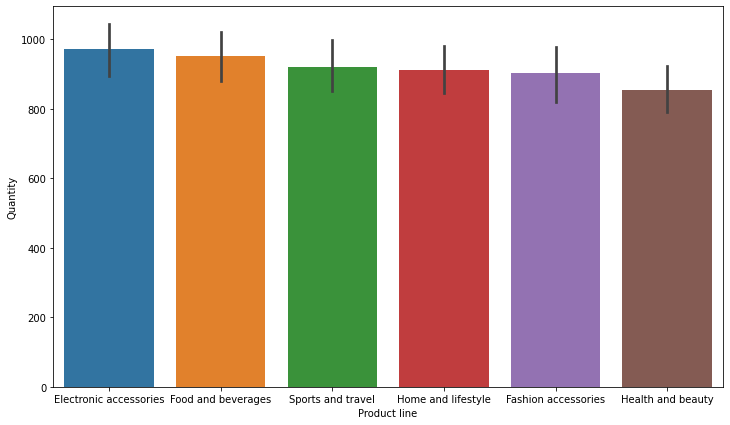

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Product line'], y=df.Quantity,estimator = np.sum, order=pt.sort_values('Quantity', ascending = False).index )

In [ ]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
pt2 = df.pivot_table(values = 'Quantity', index=['Product line','Gender'], aggfunc=sum)
pt2

Quantity
Product line           Gender          
Electronic accessories Female       488
                       Male         483
Fashion accessories    Female       530
                       Male         372
Food and beverages     Female       514
                       Male         438
Health and beauty      Female       343
                       Male         511
Home and lifestyle     Female       498
                       Male         413
Sports and travel      Female       496
                       Male         424

In [ ]:
pt2.index

MultiIndex([('Electronic accessories', 'Female'),
            ('Electronic accessories',   'Male'),
            (   'Fashion accessories', 'Female'),
            (   'Fashion accessories',   'Male'),
            (    'Food and beverages', 'Female'),
            (    'Food and beverages',   'Male'),
            (     'Health and beauty', 'Female'),
            (     'Health and beauty',   'Male'),
            (    'Home and lifestyle', 'Female'),
            (    'Home and lifestyle',   'Male'),
            (     'Sports and travel', 'Female'),
            (     'Sports and travel',   'Male')],
           names=['Product line', 'Gender'])

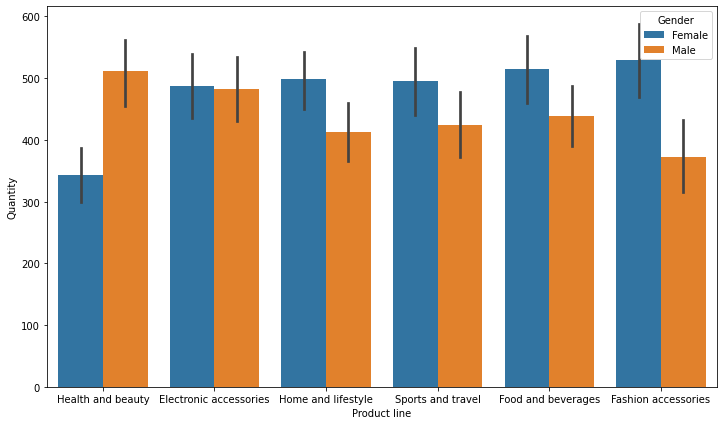

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Product line'], y=df.Quantity, hue=df.Gender, estimator = np.sum)

In [ ]:
pt3 = df.pivot_table(values = 'Quantity', index=['Product line','Branch'], aggfunc=sum)
pt3

Quantity
Product line           Branch          
Electronic accessories A            322
                       B            316
                       C            333
Fashion accessories    A            263
                       B            297
                       C            342
Food and beverages     A            313
                       B            270
                       C            369
Health and beauty      A            257
                       B            320
                       C            277
Home and lifestyle     A            371
                       B            295
                       C            245
Sports and travel      A            333
                       B            322
                       C            265

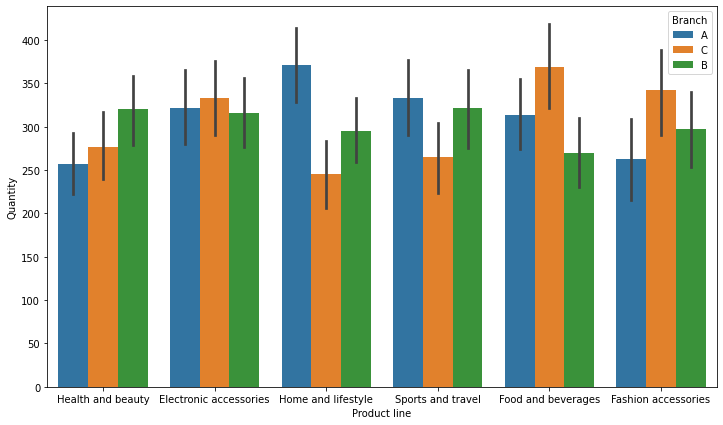

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Product line'], y=df.Quantity, hue=df.Branch, estimator = np.sum)

In [ ]:
pt4 = df.pivot_table(values = 'Quantity', index=['Product line','Customer type'], aggfunc=sum)
pt4

Quantity
Product line           Customer type          
Electronic accessories Member              429
                       Normal              542
Fashion accessories    Member              439
                       Normal              463
Food and beverages     Member              506
                       Normal              446
Health and beauty      Member              428
                       Normal              426
Home and lifestyle     Member              490
                       Normal              421
Sports and travel      Member              493
                       Normal              427

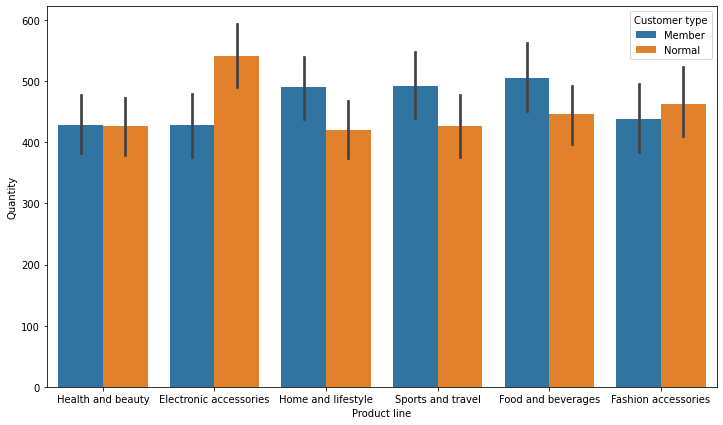

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Product line'], y=df.Quantity, hue=df['Customer type'], estimator = np.sum)

In [ ]:
pt5 = df.pivot_table(values = 'Quantity', index=['Product line','Payment'], aggfunc=sum)
pt5

Quantity
Product line           Payment              
Electronic accessories Cash              398
                       Credit card       262
                       Ewallet           311
Fashion accessories    Cash              280
                       Credit card       293
                       Ewallet           329
Food and beverages     Cash              295
                       Credit card       335
                       Ewallet           322
Health and beauty      Cash              293
                       Credit card       274
                       Ewallet           287
Home and lifestyle     Cash              306
                       Credit card       259
                       Ewallet           346
Sports and travel      Cash              324
                       Credit card       299
                       Ewallet           297

In [ ]:
pt6 = df.pivot_table(values = 'Quantity', index=['City','Product line'], aggfunc=sum).sort_values(by=['City','Quantity'],ascending=False)
pt6

Quantity
City      Product line                    
Yangon    Home and lifestyle           371
          Sports and travel            333
          Electronic accessories       322
          Food and beverages           313
          Fashion accessories          263
          Health and beauty            257
Naypyitaw Food and beverages           369
          Fashion accessories          342
          Electronic accessories       333
          Health and beauty            277
          Sports and travel            265
          Home and lifestyle           245
Mandalay  Sports and travel            322
          Health and beauty            320
          Electronic accessories       316
          Fashion accessories          297
          Home and lifestyle           295
          Food and beverages           270

In [ ]:
pt7 = df.pivot_table(values = 'Quantity', index=['City'], aggfunc=sum).sort_values(by=['Quantity'],ascending=False)
pt7

,Quantity
City,
Yangon,1859
Naypyitaw,1831
Mandalay,1820


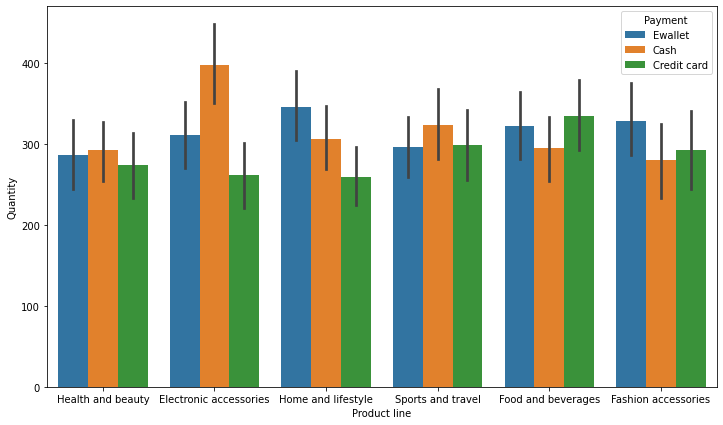

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Product line'], y=df.Quantity, hue=df.Payment, estimator= np.sum)

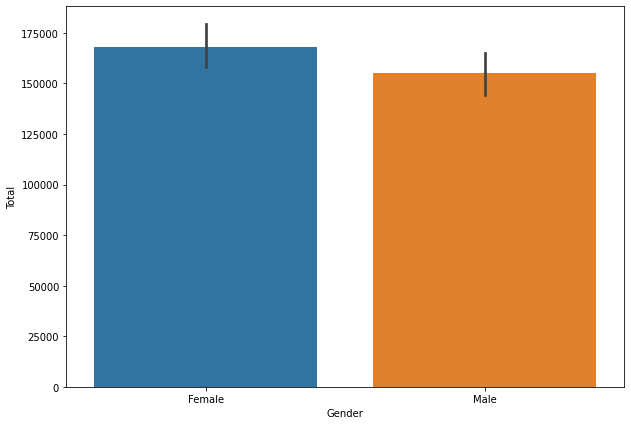

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Gender'], y=df.Total, estimator = np.sum)

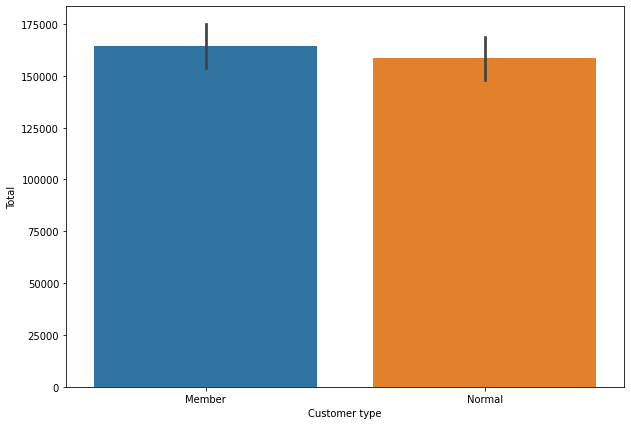

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Customer type'], y=df.Total, estimator = np.sum)

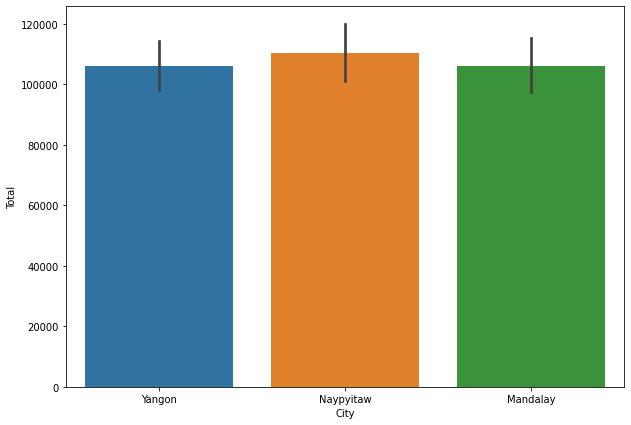

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['City'], y=df.Total, estimator = np.sum)

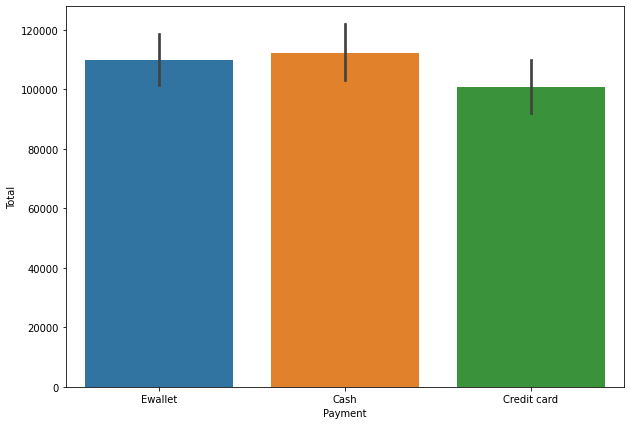

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Payment'], y=df.Total, estimator = np.sum)

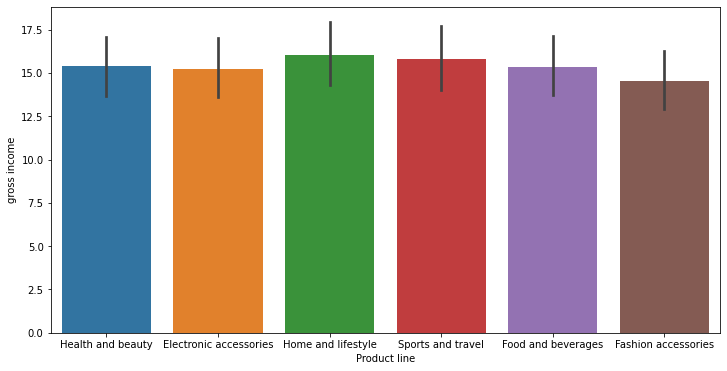

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Product line"],y=df["gross income"])

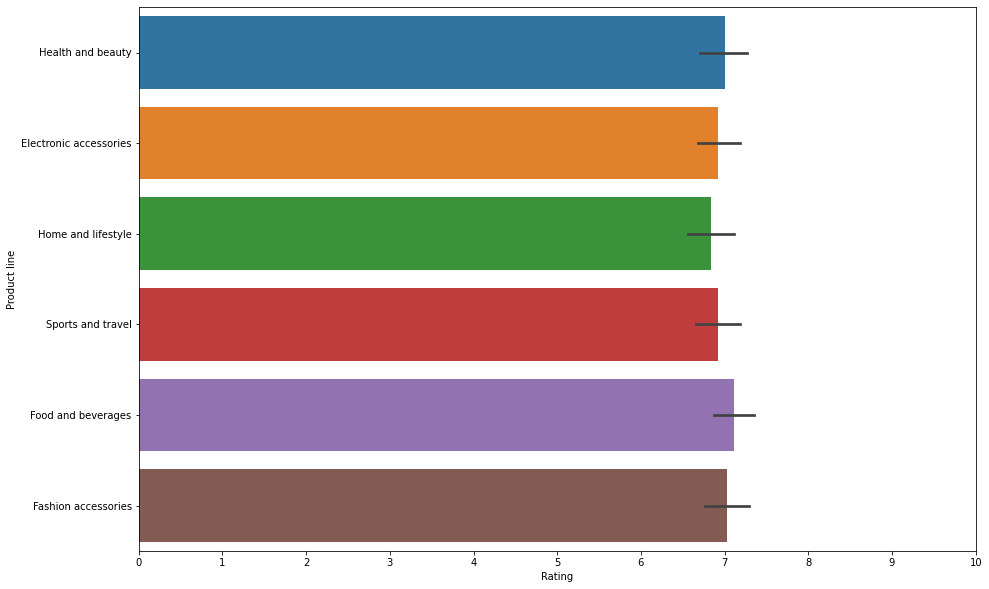

In [ ]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(15,10))
sns.barplot(y=df["Product line"],x=df["Rating"])
plt.xticks(xdata)
plt.show()

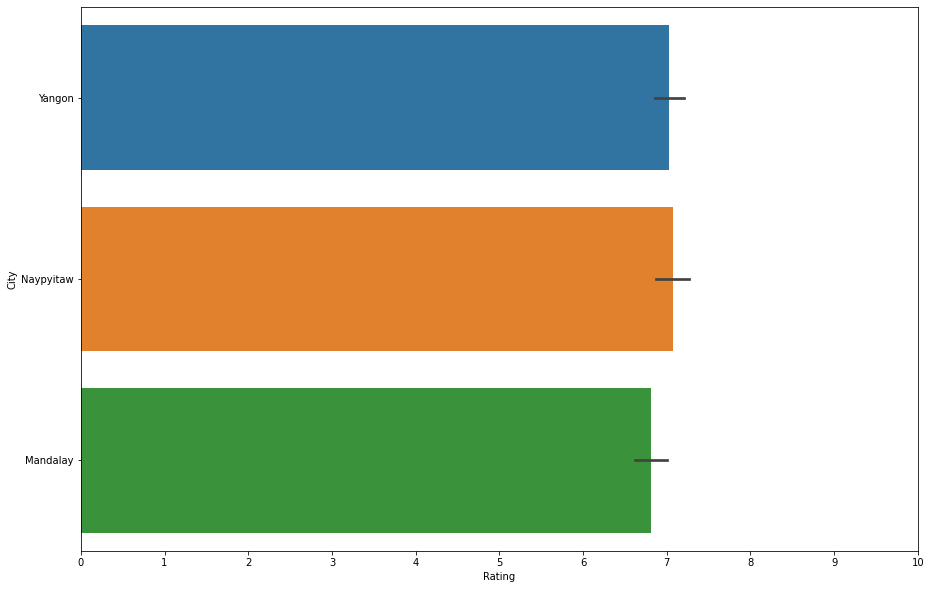

In [ ]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(15,10))
sns.barplot(y=df["City"],x=df["Rating"])
plt.xticks(xdata)
plt.show()

In [ ]:
pt8 = df.pivot_table(values = 'Rating', index=['City'], aggfunc='mean').sort_values(by=['Rating'],ascending=False)
pt8

,Rating
City,
Naypyitaw,7.072866
Yangon,7.027059
Mandalay,6.818072
